In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import numpy as np

In [4]:
from ase import Atoms

In [5]:
from ace_plus_q.magaceutils import init_magace_calc_from_saved_model, init_magace_calc_from_yaml

2023-09-06 17:26:20.646874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 17:26:24.377450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-06 17:26:31.411520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6637 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:04:00.0, compute capability: 7.5


In [27]:
symbls = ['Fe', 'Fe', 'Fe', 'Ni']
pos = np.array([[0.0, 0.5, 0.5],
                [0.5, 0.0, 0.5],
                [0.5, 0.5, 0.0],
                [0.0, 0.0, 0.0]])
cell = np.eye(3) * 3.585
at = Atoms(symbols=symbls, cell=cell, scaled_positions=pos, pbc=True) 

In [28]:
magmom = np.zeros([len(at), 3])
at.set_initial_magnetic_moments(magmom)

# From yaml

In [29]:
calc = init_magace_calc_from_yaml('./saves/step_1000/m_ace.yaml', cutoff=5)

In [30]:
at.set_calculator(calc)

In [31]:
at.get_potential_energy()

-31.2125509962745

# From saved_model

In [11]:
calc = init_magace_calc_from_saved_model('Mag_ACE/', cutoff=5)

In [12]:
at.set_calculator(calc)

In [13]:
at.get_potential_energy()

-31.2125509962745

# Rotate magnetic moments

In [22]:
angles = np.linspace(0., 180., num=20) * (np.pi / 180.)

collect_mag_fe = []
collect_mag_ni = []
collect_ene = []
for theta in angles:
    at_new = at.copy()
    natoms = len(at_new)
    magmom = np.zeros([natoms, 3])
    
    nfer = [2.4]
    nnir = [0.7]
    for m_fe in nfer:
        for m_ni in nnir:

            costheta = np.cos(theta)
            sintheta = np.sin(theta)
            magmom[3] = [0., 0., m_ni]
            magmom[0] = [0., m_fe * sintheta, m_fe * costheta]
            magmom[1] = [0., m_fe * sintheta, m_fe * costheta]
            magmom[2] = [0., m_fe * sintheta, m_fe * costheta]
            at.set_initial_magnetic_moments(magmom)
            at.set_calculator(calc)
            e = at.get_potential_energy()

            collect_ene.append(e)
            collect_mag_fe.append(m_fe)
            collect_mag_ni.append(m_ni)
collect_ene = np.vstack(collect_ene)

Text(0, 0.5, 'Energy, eV')

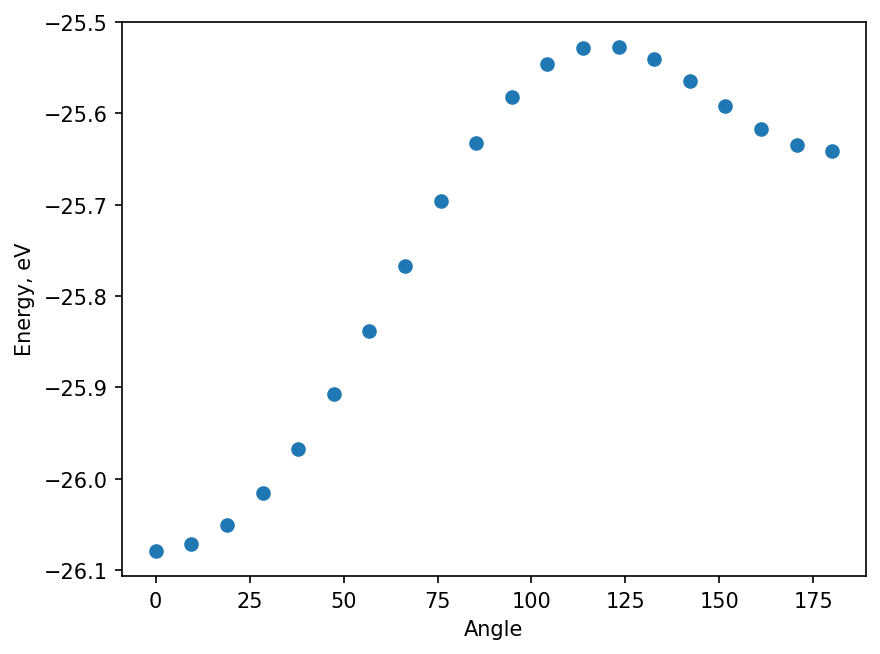

In [15]:
plt.figure(dpi=150)
plt.plot(angles/ (np.pi / 180.), collect_ene, 'o')
plt.xlabel('Angle')
plt.ylabel('Energy, eV')